## Predict Career Longevity for NBA Rookies

**About the data**

The dataset contains player statistics for NRB Rookies. There are 1100+ observations in the train dataset with 19 variables excluding the target variable 

 

**Data Description**

 

GP: Games Played (here you might find some values in decimal, consider them to be the floor integer, for example, if the value is 12.789, the number of games played by the player is 12)

 

The values for given attributes are averaged over all the games played by players

- MIN:  Minutes Played

- PTS: Number of points per game

- FGM: Field goals made
- FGA: Field goals attempt

- FG%: field goals percent

- 3P Made: 3 point made

- 3PA: 3 points attempt

- 3P%: 3 point percent

- FTM: Free throw made

- FTA: Free throw attempts

- FT%: Free throw percent

- OREB: Offensive rebounds

- DREB: Defensive rebounds

- REB: Rebounds

- AST: Assists

- STL: Steals

- BLK: Blocks

- TOV: Turnovers

- Target: 0 if career years played < 5, 1 if career years played >= 5

### Importing Libraries

In [7]:
# Manipulation Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Sklearn Libraries
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split , cross_val_score , KFold , RandomizedSearchCV,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import xgboost as xgb

# More Libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from termcolor import colored
import warnings
warnings.filterwarnings('ignore')

### Load Dataset

In [8]:
def load_dataset(path):
    return pd.read_csv(path)

In [9]:
train = load_dataset('train_data.csv')
test = load_dataset('test_data.csv')

### Preview Dataset

In [10]:
train.head()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,Target
0,59.0,12.8,3.4,1.3,2.6,51.0,0.2,0.3,50.0,0.7,0.8,78.0,1.1,2.3,3.3,0.5,0.3,0.4,0.5,1
1,31.0,10.7,3.4,1.2,3.3,35.3,0.5,2.1,25.8,0.5,0.9,55.2,0.3,1.1,1.4,0.4,0.3,0.1,0.2,0
2,48.0,9.3,4.5,1.7,3.4,49.7,0.0,0.1,0.0,1.2,1.9,61.5,0.4,0.8,1.2,0.8,0.5,0.4,1.0,0
3,80.0,27.7,11.2,3.5,9.4,37.4,1.3,4.1,32.9,2.8,3.3,85.0,0.8,1.6,2.4,3.9,1.3,0.1,2.2,1
4,58.0,18.4,5.8,1.9,5.3,36.7,0.0,0.1,25.0,1.9,3.1,61.7,0.5,0.7,1.2,1.9,1.1,0.2,1.7,0


In [11]:
test.head()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV
0,44.0,13.0,6.6,2.5,5.6,45.3,0.4,1.3,32.7,1.1,1.7,65.3,0.8,0.6,1.4,1.1,0.7,0.2,1.0
1,51.0,9.1,2.7,1.0,2.7,39.0,0.1,0.3,23.5,0.6,0.8,69.8,0.3,0.7,1.0,0.9,0.6,0.1,0.7
2,51.0,15.1,5.7,2.2,5.2,41.2,0.3,0.8,32.5,1.1,1.6,69.1,0.4,1.3,1.7,2.1,0.7,0.0,1.4
3,15.0,7.9,1.9,0.7,2.5,27.0,0.0,0.0,0.0,0.5,0.8,66.7,0.5,1.1,1.5,0.5,0.1,0.1,1.0
4,36.0,14.4,5.8,2.3,5.4,43.1,0.0,0.1,50.0,1.1,1.4,82.0,1.1,1.4,2.4,0.9,0.3,0.2,0.9


In [12]:
def check_df(df):
    print(" SHAPE ".center(60, '~'))
    print('Observations -------> {}'.format(df.shape[0]))
    print('Features     -------> {}'.format(df.shape[1]))
    print(f"Shape of dataset: {colored(df.shape, 'red')}")
    print(" Types of Features ".center(60, '~'))
    print(df.dtypes,"\n")
    print(" Categorical Features ".center(60, '~'))
    print(f'Features -------> {df.select_dtypes(include = [object]).columns}')
    print('\t')
    print (f'Size: {len(df.select_dtypes(include = [object]).columns)}')
    print(" Numerical Features ".center(60, '~'))
    print(f'Features -------> {df.select_dtypes(exclude = [object]).columns}')
    print('\t')
    print (f'Size: {len(df.select_dtypes(exclude = [object]).columns)}')
    print(' Duplicate Values Analysis '.center(60, '~'))
    print("\n",df.duplicated().sum(),"\n")
    print(" QUANTILES ".center(60, '~'))
    print("\n",df.quantile([0.25, 0.75]).T,"\n")
    
check_df(train)

~~~~~~~~~~~~~~~~~~~~~~~~~~ SHAPE ~~~~~~~~~~~~~~~~~~~~~~~~~~~
Observations -------> 1101
Features     -------> 20
Shape of dataset: (1101, 20)
~~~~~~~~~~~~~~~~~~~~ Types of Features ~~~~~~~~~~~~~~~~~~~~~
GP         float64
MIN        float64
PTS        float64
FGM        float64
FGA        float64
FG%        float64
3P Made    float64
3PA        float64
3P%        float64
FTM        float64
FTA        float64
FT%        float64
OREB       float64
DREB       float64
REB        float64
AST        float64
STL        float64
BLK        float64
TOV        float64
Target       int64
dtype: object 

~~~~~~~~~~~~~~~~~~~ Categorical Features ~~~~~~~~~~~~~~~~~~~
Features -------> Index([], dtype='object')
	
Size: 0
~~~~~~~~~~~~~~~~~~~~ Numerical Features ~~~~~~~~~~~~~~~~~~~~
Features -------> Index(['GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3P Made', '3PA', '3P%', 'FTM',
       'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV',
       'Target'],
      dtype='object')
	
Size: 20
~~~~

In [370]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1101 entries, 0 to 1100
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   GP       1101 non-null   float64
 1   MIN      1101 non-null   float64
 2   PTS      1101 non-null   float64
 3   FGM      1101 non-null   float64
 4   FGA      1101 non-null   float64
 5   FG%      1101 non-null   float64
 6   3P Made  1101 non-null   float64
 7   3PA      1101 non-null   float64
 8   3P%      1101 non-null   float64
 9   FTM      1101 non-null   float64
 10  FTA      1101 non-null   float64
 11  FT%      1101 non-null   float64
 12  OREB     1101 non-null   float64
 13  DREB     1101 non-null   float64
 14  REB      1101 non-null   float64
 15  AST      1101 non-null   float64
 16  STL      1101 non-null   float64
 17  BLK      1101 non-null   float64
 18  TOV      1101 non-null   float64
 19  Target   1101 non-null   int64  
dtypes: float64(19), int64(1)
memory usage: 172.2 KB


**Target Variable Distribution**

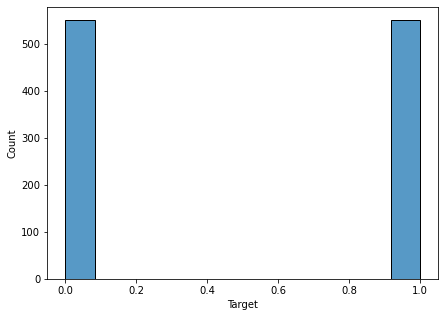

In [371]:
# Target Variable Distribution - Dataset Balance Check
plt.figure(figsize=(7,5))
sns.histplot(train.Target)
plt.show()

We can say that the target variable has a very good distribution and as a result, our target variable is not unbalanced.

### Descriptive Statistics

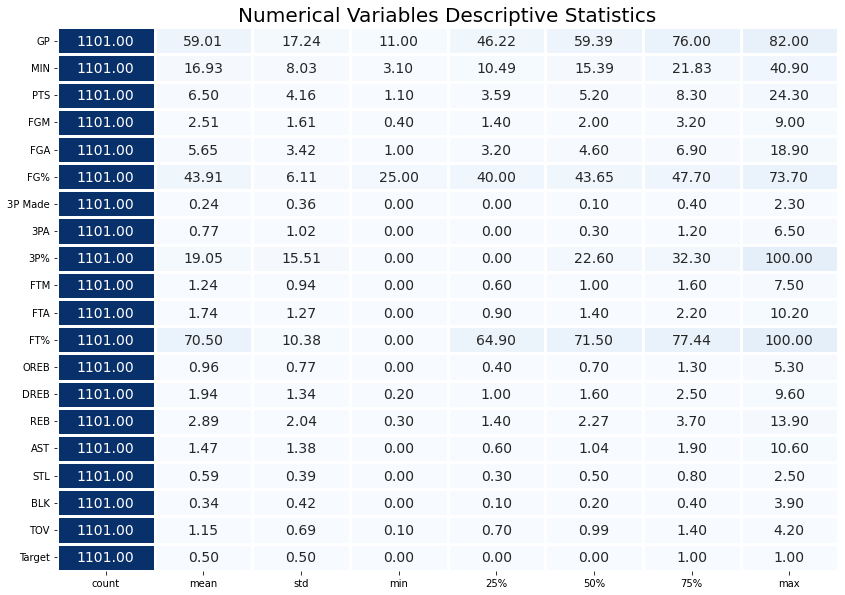

In [372]:
def describe_plot(df):
    describe = df.describe().T
    plt.figure(figsize = (14,10))
    sns.heatmap(describe,
                annot = True,
                cmap = "Blues",
                fmt= '.2f',
                linecolor = 'white',
                linewidths = 1.35,
                cbar = False,
                annot_kws = {"size": 14})
    plt.title("Numerical Variables Descriptive Statistics" , fontsize = 20)
    plt.show()
    
describe_plot(train)

If it is necessary to examine the graph showing the Descriptive Statistics analysis;
- GP represents the number of games played, and we can see that the standard deviation amount is high compared to other variables. Some players have played a lot of games while others have played less, and for a player to play a lot of games means that his career year is more.

### Detection of Features

In [373]:
def check_uniques(df):
    unique_values = []
    for col in df.columns:
        unique_values.append(len(df[col].unique()))
        
    unique_dict = {'unique_values' : unique_values}
    return pd.DataFrame(unique_dict , index=df.columns)
check_uniques(train)

,unique_values
GP,274
MIN,514
PTS,392
FGM,289
FGA,366
FG%,480
3P Made,132
3PA,216
3P%,349
FTM,258


The total number of observations in our dataset is 1101. It may not make sense to take a unique number on continuous variables, but we can say this. Players have some identical characteristics that belong to each other.
- The FT% value is a value that changes much more frequently from player to player.
- The 3P Made variant may be more similar to other variables than other variables.


### Correlation Coefficients

In [374]:
def correlation_coefficients(df):
    # Correlation between different variables
    corr = df.corr()
    # Set up the matplotlib plot configuration
    f, ax = plt.subplots(figsize=(12, 10))
    # Generate a mask for upper traingle
    mask = np.triu(np.ones_like(corr, dtype=bool))
    # Configure a custom diverging colormap
    cmap = sns.diverging_palette(230, 20, as_cmap=True)
    # Draw the heatmap
    sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)
    
def variable_variances(df):
    return pd.DataFrame(df.var() , columns=['feature_variance'])

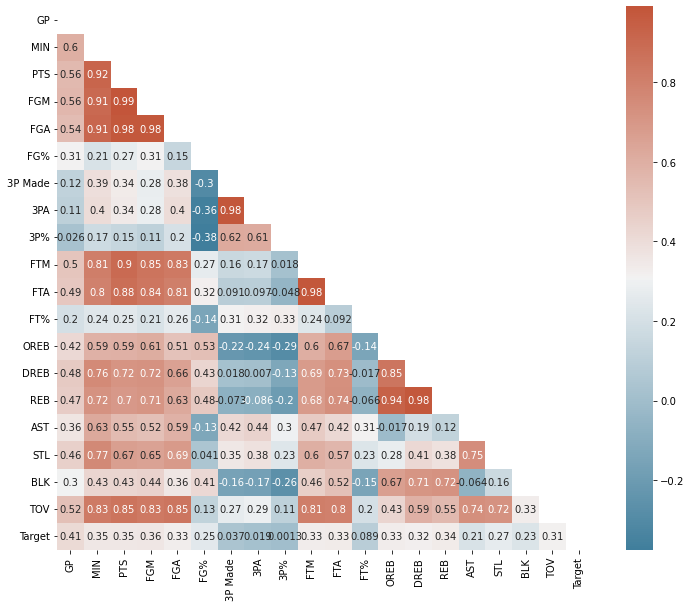

In [375]:
correlation_coefficients(train)

In [376]:
variable_variances(train).sort_values(by = 'feature_variance')

,feature_variance
3P Made,0.131775
STL,0.149109
BLK,0.175427
Target,0.250227
TOV,0.472940
OREB,0.594972
FTM,0.879066
3PA,1.034725
FTA,1.618104
DREB,1.802648


When we look at the variance values, there are variables with very high variance, so we will need to scale up.

In [377]:
def corrFilter(x: pd.DataFrame, bound: float , corr_method  ='pearson'):
    xCorr = x.corr(method=corr_method)
    xFiltered = xCorr[((xCorr >= bound) | (xCorr <= -bound)) & (xCorr !=1.000)]
    xFlattened = xFiltered.unstack().sort_values().drop_duplicates()
    return xFlattened

In [378]:
corrFilter(train, .95)

DREB     REB    0.979235
FGM      FGA    0.979742
PTS      FGA    0.980013
FTM      FTA    0.980388
3P Made  3PA    0.982678
PTS      FGM    0.991033
GP       GP          NaN
dtype: float64

In [379]:
corrFilter(train, .95 , 'kendall')

GP  GP   NaN
dtype: float64

In [380]:
corrFilter(train, .95 , 'spearman')

FGM   FGA    0.971527
DREB  REB    0.972044
PTS   FGA    0.973548
FTM   FTA    0.975880
PTS   FGM    0.990081
GP    GP          NaN
dtype: float64

We have variables with a correlation amount of more than 0.95 between 3 different types of correlation and variables, and it may be sufficient to keep one of these variables. The relationship between each other is so close that we can reduce model complexity by removing one.

Since removing variables will result in a huge loss of information, and we want to make sure before removing them, we will be checking again through multiple linearity.

In [381]:
# compute the vif for all given features
def compute_vif(df, considered_features):
    
    X = df[considered_features]
    # the calculation of variance inflation requires a constant
    X['intercept'] = 1
    
    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

In [382]:
compute_vif(train , train.columns[:-1]).sort_values(by = 'VIF' ,ascending = False)

,Variable,VIF
2,PTS,3666.287286
3,FGM,2143.245768
14,REB,1961.980997
13,DREB,853.769413
12,OREB,284.782589
9,FTM,220.427740
4,FGA,131.014763
10,FTA,70.629762
6,3P Made,57.351380
7,3PA,40.088923


When we examine the correlation relationships with different methods, we can see that there are variables with very high VIF value and at the same time high correlation relationship with other variables.

### Outlier and Missing Values Analysis

In [383]:
# Checking Missing Values
pd.DataFrame(train.isna().sum() , columns=['missing_values'])

,missing_values
GP,0
MIN,0
PTS,0
FGM,0
FGA,0
FG%,0
3P Made,0
3PA,0
3P%,0
FTM,0


There is no missing value in our data set.

In [384]:
def outlier_analysis(selection , df):
    columns = df.columns[:-1]
    # Outlier Box Plot
    if selection == 0:
        for col in columns:
            plt.figure(figsize=(3,3))
            sns.boxplot(df[col])
    plt.show()
        
    # IQR Range Outliers
    if selection == 1:
        outlier_dict = dict()
        for col in columns:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3-Q1
            lower , upper = ('%.2f' % (Q1 - 1.5 * IQR)), ('%.2f' % (Q3 + 1.5 * IQR))
            outlier_dict[col] = (lower ,upper)
        return outlier_dict  

There are many methods by which we can observe outliers. When we observe the outliers on the two most common methods, we can see that our variables have outliers. Especially when we look at the graphs, there is a lot of data that exceeds the max value, but it would not make sense to remove all of them, so we will be looking at the most extreme points when uninstalling. We will be examining the values that distinguish ourselves from other values and removing those values.

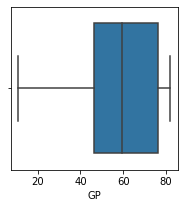

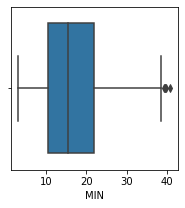

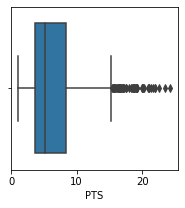

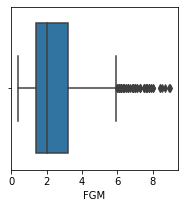

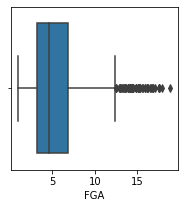

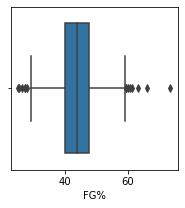

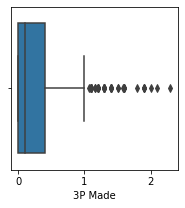

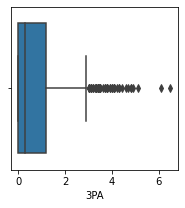

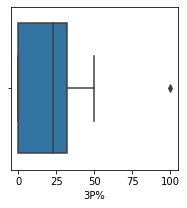

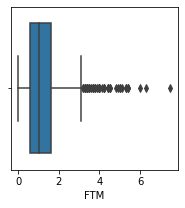

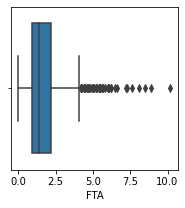

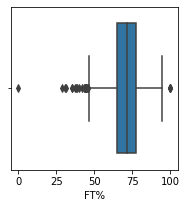

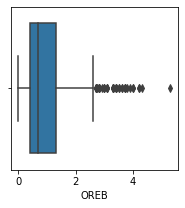

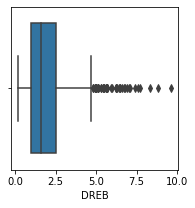

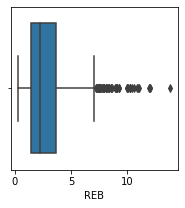

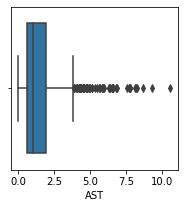

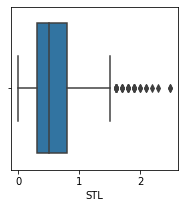

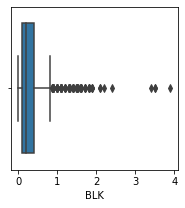

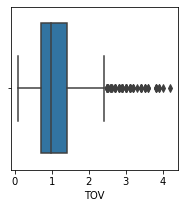

{'GP': ('1.56', '120.67'),
 'MIN': ('-6.51', '38.84'),
 'PTS': ('-3.48', '15.37'),
 'FGM': ('-1.30', '5.90'),
 'FGA': ('-2.35', '12.45'),
 'FG%': ('28.45', '59.25'),
 '3P Made': ('-0.60', '1.00'),
 '3PA': ('-1.79', '2.99'),
 '3P%': ('-48.45', '80.75'),
 'FTM': ('-0.90', '3.10'),
 'FTA': ('-1.05', '4.15'),
 'FT%': ('46.09', '96.24'),
 'OREB': ('-0.95', '2.65'),
 'DREB': ('-1.25', '4.75'),
 'REB': ('-2.05', '7.15'),
 'AST': ('-1.35', '3.85'),
 'STL': ('-0.45', '1.55'),
 'BLK': ('-0.35', '0.85'),
 'TOV': ('-0.35', '2.45')}

In [24]:
outlier_analysis(0 , train)
outlier_analysis(1 , train)

Aykırı gözlem analizi yaparak veri setimizdeki aykırı değerler tespit edilmiştir.

### Feature Engineering
 - Remove Outlier Values
 - Remove High Corelation Features
 - Normalization
 
Pre-processing steps that we will perform. Since there are no missing data in our data set, no operation has been performed on the missing values. While we use the scaling process in different algorithms, we will not use it in some algorithms, and based on this, the preprocessing function has been created.

```python
def remove_outliers(df, outliers_dict):
    values = list(outliers_dict.values())
    keys = list(outliers_dict.keys())
    for index ,key in enumerate(keys):
        df = df[~((df[key] < float(values[index][0])) | (df[key] > float(values[index][1])))]
        
    return df      

outliers_dict = outlier_analysis(1 , train)
df = remove_outliers(train ,outliers_dict )
```

In [459]:
def preprocessing(df , control = 0):
    # Dataset Columns
    columns = ['GP', 'MIN', 'FGM', 'FG%', '3P Made', '3P%',
       'FTA', 'FT%','OREB', 'REB', 'AST', 'STL', 'TOV']
    # Remove Features
    df = df.drop(columns = ['PTS' , 'DREB', 'FTM', 'FGA' ,'3PA'] , axis = 1)
    
    if control == 1:
        # Remove Outliers
        df = df[~(df['MIN'] > 38.84)]
        df = df[~(df['3P%'] > 80.75)]
        df = df[~(df['FG%'] > 60)]
        df = df[~(df['BLK'] > 3)]
        df = df[~(df['OREB'] > 5)]
        df = df[~(df['FTA'] > 9)]
        df = df[~((df['FT%'] < 30) | (df['FT%'] > 96.24))]
    
       
    # Normalization    
    if control == 2:
        scaler = StandardScaler()
        df[columns] = scaler.fit_transform(df[columns])
        
    return df

In [479]:
# Get the Dataset
df = preprocessing(train, control=1)
test_set = preprocessing(test)

### Model Selecting and Fitting

Before we start hyperparameter tuning our model, we will be looking for the models that give the best results and thus we will only be getting the models that work for us without performing parameter updating of multiple models.

In [480]:
def split_data(df):
    # Train Set
    X = df.drop('Target' , axis = 1)
    y = df['Target']
    
    X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=1111)
    
    return X_train , X_test , y_train , y_test , X , y


def model_training(inputs , labels , models , input_test , input_label):
    train_accuracy = {}
    test_accuracy = {}
    for name , model in models.items():
        # model training
        model.fit(inputs , labels)
        # predictions
        pred_train = model.predict(inputs)
        pred_test = model.predict(input_test)
        # accuracy score 
        train_accuracy[name] = accuracy_score(pred_train , labels)
        test_accuracy[name] = accuracy_score(pred_test , input_label)
        
    return train_accuracy , test_accuracy


def cross_validation_training(X , y , n_split ,  models):
    cv_accuracy = {}
    kf = KFold(n_splits = n_split)
    for name , model in models.items():
        # cv training
        cv = cross_val_score(model , X , y  ,cv = kf , n_jobs = -1 , scoring='accuracy')
        cv_accuracy[name] = np.mean(cv)
    return cv_accuracy

In [516]:
X_train , X_test , y_train , y_test , X, y = split_data(df)
models = {'Random Forest Classifier': RandomForestClassifier() ,
          'KNN' : KNeighborsClassifier() , 
          'Xgboost' : xgboost.XGBClassifier() ,
          'Support Vector Machine':  SVC() , 
          'Logistic Regression' :  LogisticRegression(solver='lbfgs', max_iter=1000) ,
          'DecisionTreeClassifier': DecisionTreeClassifier(),
         'GradientBoostingClassifier' : GradientBoostingClassifier()}

In [517]:
# Default Model Training
train_accuracy , test_accuracy = model_training(X_train, y_train , models , X_test , y_test)

In [518]:
train_accuracy

{'Random Forest Classifier': 0.9884125144843569,
 'KNN': 0.7879490150637312,
 'Xgboost': 0.9884125144843569,
 'Support Vector Machine': 0.6836616454229433,
 'Logistic Regression': 0.7056778679026651,
 'DecisionTreeClassifier': 0.9884125144843569,
 'GradientBoostingClassifier': 0.8899188876013905}

In [519]:
test_accuracy

{'Random Forest Classifier': 0.7824074074074074,
 'KNN': 0.7083333333333334,
 'Xgboost': 0.7777777777777778,
 'Support Vector Machine': 0.6898148148148148,
 'Logistic Regression': 0.6990740740740741,
 'DecisionTreeClassifier': 0.6388888888888888,
 'GradientBoostingClassifier': 0.7685185185185185}

In [512]:
# Cross Validation
cv_accuracy = cross_validation_training(X , y  , 10, models=models)

In [513]:
cv_accuracy

{'Random Forest Classifier': 0.7460453444098303,
 'KNN': 0.7006317064728279,
 'Xgboost': 0.7135687088958118,
 'Support Vector Machine': 0.6848736587054344,
 'Logistic Regression': 0.7006143994461752,
 'DecisionTreeClassifier': 0.6450155763239876,
 'GradientBoostingClassifier': 0.7265143648321217}

GradientBoostingClassifier, Xgboost, and Random Forest Classifier were the ones that gave the best results. Now we can move on to the hyperparameter tuning section.

### Hyperparameter Tuning

After passing the phase of testing our models, we will be trying to find the optimum parameter values by performing hyperparameter tuning on the RandomForest Classifier model.

In [566]:
# RandomForest Classifier
param_rfc = {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
               'max_features': ['auto', 'sqrt'],
               'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
               'bootstrap': [True, False]}


# XGBClassifier
param_xgb = {'max_depth': [3, 6, 10, 15],
              'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.4],
              'subsample': np.arange(0.5, 1.0, 0.1),
              'colsample_bytree': np.arange(0.5, 1.0, 0.1),
              'colsample_bylevel': np.arange(0.5, 1.0, 0.1),
              'n_estimators': [100, 250, 500, 750],
              'num_class': [10]
              }

# DesicionTreeClassifier
parameters = dict(pca__n_components=list(range(1,X.shape[1]+1,1)),
                      dec_tree__criterion=['gini', 'entropy'],
                      dec_tree__max_depth=[2,4,6,8,10,12])


# KNeighborsClassifier
param_knn = {'n_neighbors' : np.arange(1, 16),
             'metric' : ['euclidean','manhattan']}

# GradientBoostingClassifier   
param_sgb = {'n_estimators':[10, 100, 1000],
            'learning_rate' : [0.01, 0.1, 0.2, 0.3, 0.4],
            'subsample' :[0.5, 0.7, 1.0],
            'max_depth' : [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}

# LogisticRegression
param_lr= [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }]

In [557]:
def hyperparameter_tuning(train_features , train_labels , model , params  , check):
    # Randomized Search CV
    if check == 0:
        randomized_cv = RandomizedSearchCV(estimator=model , param_distributions=params ,cv = 10  ,n_jobs=-1 ,n_iter = 100, verbose=True)
        randomized_cv.fit(train_features , train_labels)
        # parameters and best model
        best_params = randomized_cv.best_params_
        best_model = randomized_cv.best_estimator_

        return best_params ,best_model
    # GridSearchCV
    if check == 1:
        grid_cv = GridSearchCV(estimator=model , param_grid=params , cv = 10, n_jobs=-1, verbose = True)
        grid_cv.fit(train_features ,train_labels)
        
        return grid_cv.best_params_ , grid_cv.best_estimator_


In [ ]:
best_params , best_model = hyperparameter_tuning(X_train , y_train ,XGBClassifier() ,param_xgb , check=0)

In [544]:
# Model Training with best model
final_model = best_model.fit(X,y)

In [545]:
def prediction(model, x_test , y_test):
    pred = model.predict(x_test)
    return accuracy_score(pred , y_test)

In [546]:
prediction(final_model, X_test , y_test)

1.0

After evaluating the y_test and X_test I booked through the Train set, GradientBoostingClassifier gave the best result, achieving a high score.